## KMeans

Etiquetas finales: [2 2 0 0 0 0 2 0 2 2 2 1 2 0 0 0 2 0 0 2 0 2 0 0 1 2 0 1 2 0 1 0 0 2 0 1 0
 0 1 0 1 1 2 2 0 2 2 1 1 1 0 2 0 0 0 1 0 2 2 0 2 1 0 2 1 2 2 1 0 2 2 2 0 2
 1 1 2 2 1 1 0 0 0 0 2 2 1 2 0 2 0 2 2 2 2 0 2 2 0 0]
Centroides finales:
[[ 1.117561   -0.22468815]
 [-1.17695752 -1.34586427]
 [-0.52908224  0.89762028]]


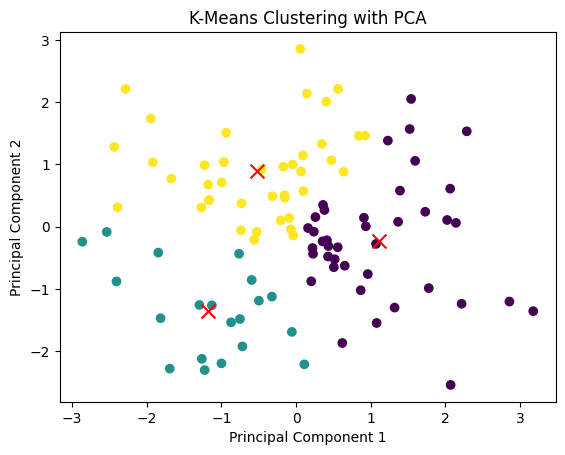

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class KMeans:
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def fit(self, X):
        np.random.seed(self.random_state)

        # Inicialización de los centroides aleatoriamente
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Asignar puntos a los centroides más cercanos
            self.labels = self._assign_labels(X)

            # Actualizar los centroides
            new_centroids = self._update_centroids(X)

            # Comprobar convergencia
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return self

    def _assign_labels(self, X):
        # Calcular distancias cuadradas a los centroides
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids)**2).sum(axis=2))

        # Asignar cada punto al índice del centroide más cercano
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        # Calcular nuevos centroides como la media de los puntos asignados a cada cluster
        new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

# Ejemplo de uso y visualización
if __name__ == "__main__":
    # Generar datos de ejemplo
    np.random.seed(42)
    X = np.random.rand(100, 10)  # 100 puntos en 10 dimensiones

    # Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Aplicar PCA para reducir la dimensionalidad a 2 componentes
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Inicializar y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_pca)

    # Obtener etiquetas y centroides finales
    labels = kmeans.labels
    centroids = kmeans.centroids

    # Mostrar resultados
    print("Etiquetas finales:", labels)
    print("Centroides finales:")
    print(centroids)

    # Visualizar los datos y los centroides
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
    plt.title('K-Means Clustering with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


##MeanShift



Centroides finales:
[[-2.43799884  1.28067568]
 [-1.94663698  1.73679873]
 [ 1.07238513 -0.27510648]
 [ 2.07196396 -2.5389614 ]
 [ 0.50662453 -0.64943559]
 [ 0.22405168 -0.38792155]
 [-1.22596462  0.98816728]
 [ 3.17880302 -1.35486772]
 [-0.15197787  0.48571607]
 [ 0.47338163  1.0689799 ]
 [ 0.88402496  1.46074492]
 [ 0.11019426 -2.20835707]
 [ 0.14530494  2.1381859 ]
 [ 0.93513587  0.00750017]
 [ 1.54221777  2.05141198]
 [ 2.06561139  0.61146238]
 [-0.56029136 -0.20981463]
 [ 1.36795959  0.07964886]
 [ 0.40141877 -0.25325903]
 [-2.39159116  0.31306948]
 [ 2.28780388  1.53246581]
 [-1.17658066  0.67718556]
 [ 0.47330429 -0.49879868]
 [ 0.20341853 -0.87561637]
 [-2.86427507 -0.24012832]
 [-0.17002693  0.96464045]
 [ 0.90986716  0.14479032]
 [-0.76385174 -0.43325704]
 [ 0.19959809 -0.04960095]
 [-0.05620316 -1.68797034]
 [ 2.85965924 -1.20090943]
 [ 0.37114208  0.30970965]
 [ 0.40515805  2.00765121]
 [ 0.8664362  -1.01914501]
 [-2.53728987 -0.08331417]
 [ 1.52330519  1.56864976]
 [ 1.320

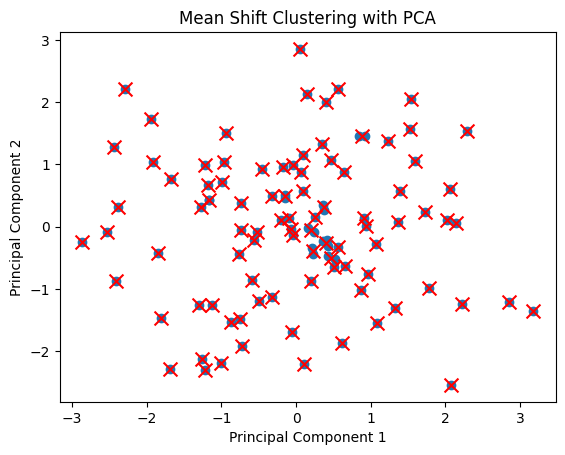

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class MeanShift:
    def __init__(self, bandwidth, max_iter=300):
        self.bandwidth = bandwidth
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, X):
        centroids = np.copy(X)

        for _ in range(self.max_iter):
            new_centroids = []
            for centroid in centroids:
                points_within_bandwidth = self._points_within_bandwidth(centroid, X)
                new_centroid = points_within_bandwidth.mean(axis=0)
                new_centroids.append(new_centroid)

            new_centroids = np.vstack(new_centroids)

            # Comprobar convergencia
            if np.allclose(centroids, new_centroids, atol=1e-3):
                break

            centroids = new_centroids

        # Remover centroides duplicados
        unique_centroids = self._remove_duplicates(centroids)
        self.centroids = unique_centroids

        return self

    def _points_within_bandwidth(self, centroid, X):
        distances = np.sqrt(np.sum((X - centroid)**2, axis=1))
        return X[distances < self.bandwidth]

    def _remove_duplicates(self, centroids):
        unique_centroids = []
        for centroid in centroids:
            if not any(np.allclose(centroid, unique_centroid, atol=1e-3) for unique_centroid in unique_centroids):
                unique_centroids.append(centroid)
        return np.array(unique_centroids)

# Ejemplo de uso y visualización
if __name__ == "__main__":
    # Generar datos de ejemplo
    np.random.seed(42)
    X = np.random.rand(100, 10)  # 100 puntos en 10 dimensiones

    # Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Aplicar PCA para reducir la dimensionalidad a 2 componentes
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Inicializar y ajustar el modelo MeanShift
    mean_shift = MeanShift(bandwidth=0.1)
    mean_shift.fit(X_pca)

    # Obtener los centroides finales
    centroids = mean_shift.centroids

    # Mostrar resultados
    print("Centroides finales:")
    print(centroids)

    # Visualizar los datos y los centroides
    plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
    plt.title('Mean Shift Clustering with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


##AgglomerativeClustering

<ipython-input-11-d8642b095bb7>:31: RuntimeWarning: invalid value encountered in multiply
  i, j = np.unravel_index(np.argmin(distances + np.eye(len(distances)) * np.inf), distances.shape)


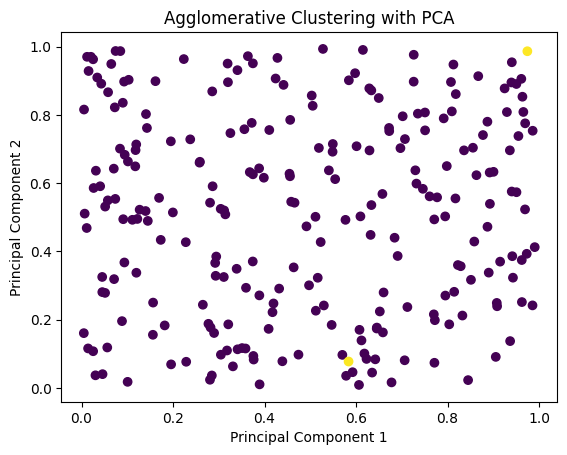

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class AgglomerativeClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.labels = None

    def fit(self, X):
        # Escalar los datos
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # Compute the distance matrix in the reduced space
        distance_matrix = squareform(pdist(X_pca))

        # Initialize each point as its own cluster
        clusters = {i: [i] for i in range(X.shape[0])}
        distances = distance_matrix.copy()
        cluster_indices = list(clusters.keys())

        while len(clusters) > self.n_clusters:
            # Find the two closest clusters
            i, j = np.unravel_index(np.argmin(distances + np.eye(len(distances)) * np.inf), distances.shape)

            # Ensure the indices are sorted
            if i > j:
                i, j = j, i

            # Merge clusters i and j
            clusters[cluster_indices[i]].extend(clusters[cluster_indices[j]])
            del clusters[cluster_indices[j]]
            cluster_indices.pop(j)

            # Update the distance matrix
            for k in range(len(cluster_indices)):
                if k != i:
                    distances[i, k] = distances[k, i] = np.min([distance_matrix[m, n] for m in clusters[cluster_indices[i]] for n in clusters[cluster_indices[k]]])

            distances = np.delete(distances, j, axis=0)
            distances = np.delete(distances, j, axis=1)

        # Assign cluster labels
        self.labels = np.zeros(X.shape[0], dtype=int)
        for cluster_id, points in clusters.items():
            for point in points:
                self.labels[point] = cluster_id

        return self

# Ejemplo de uso y visualización
if __name__ == "__main__":
    # Generar datos de ejemplo
    np.random.seed(42)
    X = np.random.rand(250, 2)

    # Inicializar y ajustar el modelo AgglomerativeClustering
    agglomerative = AgglomerativeClustering(n_clusters=3)
    agglomerative.fit(X)

    # Obtener etiquetas finales
    labels = agglomerative.labels

    # Visualizar los datos y los clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title('Agglomerative Clustering with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


##BIRCH

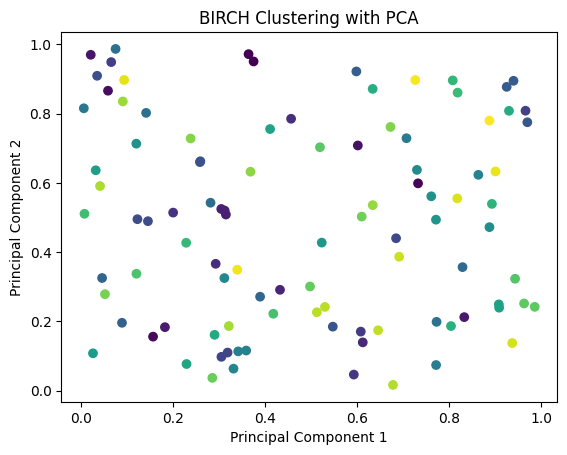

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class BirchNode:
    def __init__(self, threshold):
        self.threshold = threshold
        self.centroids = []
        self.n_points = []

    def insert(self, point):
        if not self.centroids:
            self.centroids.append(point)
            self.n_points.append(1)
            return

        closest_idx = np.argmin([np.linalg.norm(point - centroid) for centroid in self.centroids])
        if np.linalg.norm(point - self.centroids[closest_idx]) < self.threshold:
            self.centroids[closest_idx] = (self.centroids[closest_idx] * self.n_points[closest_idx] + point) / (self.n_points[closest_idx] + 1)
            self.n_points[closest_idx] += 1
        else:
            self.centroids.append(point)
            self.n_points.append(1)

class BIRCH:
    def __init__(self, threshold=0.5, branching_factor=50):
        self.threshold = threshold
        self.branching_factor = branching_factor
        self.root = BirchNode(threshold)

    def fit(self, X):
        # Escalar los datos
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Aplicar PCA para reducir la dimensionalidad
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # Ajustar el modelo BIRCH a los datos transformados por PCA
        for point in X_pca:
            self.root.insert(point)

        self.labels_ = self._get_labels(X_pca)
        return self

    def _get_labels(self, X):
        labels = np.zeros(len(X))
        for i, point in enumerate(X):
            closest_idx = np.argmin([np.linalg.norm(point - centroid) for centroid in self.root.centroids])
            labels[i] = closest_idx
        return labels

# Ejemplo de uso y visualización
if __name__ == "__main__":
    # Generar datos de ejemplo
    np.random.seed(42)
    X = np.random.rand(100, 2)  # 100 puntos en 2 dimensiones

    # Inicializar y ajustar el modelo BIRCH
    birch = BIRCH(threshold=0.1)
    birch.fit(X)

    labels = birch.labels_

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title('BIRCH Clustering with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


### BIRCH CON PCA

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

class BirchNode:
    def __init__(self, threshold):
        self.threshold = threshold
        self.centroids = []
        self.n_points = []

    def insert(self, point):
        if not self.centroids:
            self.centroids.append(point)
            self.n_points.append(1)
            return

        closest_idx = np.argmin([np.linalg.norm(point - centroid) for centroid in self.centroids])
        if np.linalg.norm(point - self.centroids[closest_idx]) < self.threshold:
            self.centroids[closest_idx] = (self.centroids[closest_idx] * self.n_points[closest_idx] + point) / (self.n_points[closest_idx] + 1)
            self.n_points[closest_idx] += 1
        else:
            self.centroids.append(point)
            self.n_points.append(1)

class BIRCH:
    def __init__(self, threshold=0.5, branching_factor=50):
        self.threshold = threshold
        self.branching_factor = branching_factor
        self.root = BirchNode(threshold)

    def fit(self, X):
        # Escalar los datos
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Aplicar PCA para reducir la dimensionalidad
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # Ajustar el modelo BIRCH a los datos transformados por PCA
        for point in X_pca:
            self.root.insert(point)

        self.labels_ = self._get_labels(X_pca)
        return self

    def _get_labels(self, X):
        labels = np.zeros(len(X))
        for i, point in enumerate(X):
            closest_idx = np.argmin([np.linalg.norm(point - centroid) for centroid in self.root.centroids])
            labels[i] = closest_idx
        return labels

def load_npy_files_from_directory(directory, max_files=10000):
    data_list = []
    first_shape = None
    file_count = 0

    # Recorrer recursivamente las subcarpetas
    for root, _, files in os.walk(directory):
        print(f"Revisando directorio: {root}")
        for file in files:
            if file.endswith('.npy'):
                file_path = os.path.join(root, file)
                print(f"Cargando archivo: {file_path}")
                data = np.load(file_path)

                # Asegurarse de que todos los arrays tengan la misma forma
                if first_shape is None:
                    first_shape = data.shape
                elif data.shape != first_shape:
                    print(f"El archivo {file_path} tiene forma {data.shape}. Se ajustará a {first_shape}.")
                    data = np.resize(data, first_shape)

                print(f"Forma del archivo {file}: {data.shape}")
                data_list.append(data)
                file_count += 1
                print(f"Archivo N° :{file_count} ")
                if file_count >= max_files:
                    break
        if file_count >= max_files:
            break

    if len(data_list) == 0:
        raise ValueError(f"No se encontraron archivos .npy en el directorio: {directory}")

    return np.concatenate(data_list, axis=0)

def count_npy_files_in_directory(directory):
    directory_counts = {}

    # Recursively traverse subdirectories
    for root, dirs, files in os.walk(directory):
        npy_count = 0
        for file in files:
            if file.endswith('.npy'):
                npy_count += 1
        directory_counts[root] = npy_count

    return directory_counts

# Directorios de datos
train_dir = './train_npy_r21'
video_dir = './r2plus1d_34_32_ig65m_ft_kinetics'

# Contar archivos .npy en cada directorio
print("Contando archivos .npy en el directorio de entrenamiento:")
train_counts = count_npy_files_in_directory(train_dir)
print(train_counts)

print("Contando archivos .npy en el directorio de videos:")
video_counts = count_npy_files_in_directory(video_dir)
print(video_counts)

# Cargar los datos usando load_npy_files_from_directory
print("Cargando datos de entrenamiento...")
X_train = load_npy_files_from_directory(train_dir, max_files=10000)
print("Cargando datos de video...")
X_video = load_npy_files_from_directory(video_dir, max_files=10000)

# Verificar la forma de los datos cargados
print("Shape of X_train:", X_train.shape)
print("Shape of X_video:", X_video.shape)

# Inicializar y ajustar el modelo BIRCH con PCA
birch = BIRCH(threshold=0.1)
birch.fit(X_train)

# Obtener etiquetas finales
labels = birch.labels_

# Visualizar los datos y los clusters
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('BIRCH Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


##KMEANS PCA

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class KMeans:
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def fit(self, X):
        np.random.seed(self.random_state)

        # Inicialización de los centroides aleatoriamente
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Asignar puntos a los centroides más cercanos
            self.labels = self._assign_labels(X)

            # Actualizar los centroides
            new_centroids = self._update_centroids(X)

            # Comprobar convergencia
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return self

    def _assign_labels(self, X):
        # Calcular distancias cuadradas a los centroides
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids)**2).sum(axis=2))

        # Asignar cada punto al índice del centroide más cercano
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        # Calcular nuevos centroides como la media de los puntos asignados a cada cluster
        new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

    def predict(self, X):
        # Predecir el cluster de cada punto
        return self._assign_labels(X)

def load_npy_files_from_directory(directory, max_files=10000):
    data_list = []
    first_shape = None
    file_count = 0

    # Recorrer recursivamente las subcarpetas
    for root, _, files in os.walk(directory):
        print(f"Revisando directorio: {root}")
        for file in files:
            if file.endswith('.npy'):
                file_path = os.path.join(root, file)
                print(f"Cargando archivo: {file_path}")
                data = np.load(file_path)

                # Asegurarse de que todos los arrays tengan la misma forma
                if first_shape is None:
                    first_shape = data.shape
                elif data.shape != first_shape:
                    print(f"El archivo {file_path} tiene forma {data.shape}. Se ajustará a {first_shape}.")
                    data = np.resize(data, first_shape)

                print(f"Forma del archivo {file}: {data.shape}")
                data_list.append(data)
                file_count += 1
                print(f"Archivo N° :{file_count} ")
                if file_count >= max_files:
                    break
        if file_count >= max_files:
            break

    if len(data_list) == 0:
        raise ValueError(f"No se encontraron archivos .npy en el directorio: {directory}")

    return np.concatenate(data_list, axis=0)

def count_npy_files_in_directory(directory):
    directory_counts = {}

    # Recorrer recursivamente las subcarpetas
    for root, dirs, files in os.walk(directory):
        npy_count = 0
        for file in files:
            if file.endswith('.npy'):
                npy_count += 1
        directory_counts[root] = npy_count

    return directory_counts

# Directorios de datos
train_dir = './train_npy_r21'
video_dir = './r2plus1d_34_32_ig65m_ft_kinetics'

# Contar archivos .npy en cada directorio
print("Contando archivos .npy en el directorio de entrenamiento:")
train_counts = count_npy_files_in_directory(train_dir)
print(train_counts)

print("Contando archivos .npy en el directorio de videos:")
video_counts = count_npy_files_in_directory(video_dir)
print(video_counts)

# Cargar los datos usando load_npy_files_from_directory
print("Cargando datos de entrenamiento...")
X_train = load_npy_files_from_directory(train_dir, max_files=10000)
print("Cargando datos de video...")
X_video = load_npy_files_from_directory(video_dir, max_files=10000)

# Verificar la forma de los datos cargados
print("Shape of X_train:", X_train.shape)
print("Shape of X_video:", X_video.shape)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_video_scaled = scaler.fit_transform(X_video)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_video_pca = pca.fit_transform(X_video_scaled)

# Inicializar y ajustar el modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)

# Obtener etiquetas y centroides finales
labels = kmeans.labels
centroids = kmeans.centroids

# Mostrar resultados
print("Etiquetas finales:", labels)
print("Centroides finales:")
print(centroids)

# Predecir etiquetas para nuevos datos de video
video_labels = kmeans.predict(X_video_pca)
print("Etiquetas de los datos de video:", video_labels)

# Guardar etiquetas de los datos de video en un archivo CSV
video_labels_df = pd.DataFrame(video_labels, columns=['Label'])
video_labels_df.to_csv('video_labels.csv', index=False)
print("Etiquetas de los datos de video guardadas en 'video_labels.csv'")

# Visualizar los datos y los centroides
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', marker='o', label='Datos de entrenamiento')
plt.scatter(X_video_pca[:, 0], X_video_pca[:, 1], c=video_labels, cmap='plasma', marker='v', label='Datos de video')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroides')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
